In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from mpl_toolkits.mplot3d import Axes3D


# Wave simulation planning

First, I am going to plot the $\text{sinc}(r)$ function where $\text{sinc}(r) = \frac{\sin(r)}{r}$, $r = \sqrt{x^2 + y^2}$

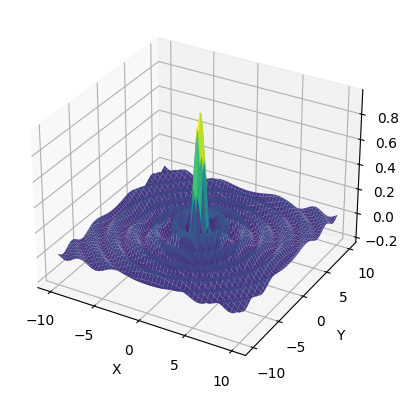

In [3]:
# Define the range of x and y values
x = np.linspace(-10, 10, 100)  # create an array of 100 equally spaced points between -10 and 10
y = np.linspace(-10, 10, 100)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)  # create a meshgrid of x and y values, which will be used to compute the values of the function at each point

# Compute the values of the sinc function for each x and y value
R = np.sqrt(X**2 + Y**2)  # compute the radial distance from the origin to each point on the meshgrid
Z = np.sinc(R)  # compute the values of the sinc function at each point on the meshgrid

# Create a 3D plot
fig = plt.figure()  # create a new figure
ax = fig.add_subplot(111, projection='3d')  # create a 3D axis object
ax.plot_surface(X, Y, Z, cmap='viridis')  # plot the 3D surface of the function, with colors given by the 'viridis' colormap
ax.set_xlabel('X')  # label the x-axis
ax.set_ylabel('Y')  # label the y-axis
ax.set_zlabel('Sinc(r)')  # label the z-axis

# Save the plot as a PNG file
plt.savefig('sinc_plot.png')  # save the plot as a PNG file with the name 'sinc_plot.png'

# Show the plot
plt.show()  # display the plot in the Python environment




Now, I am looking to model travelling waves, these aren't necessarily accurate as these simply model arbitrary waves. But this will be modified in due course

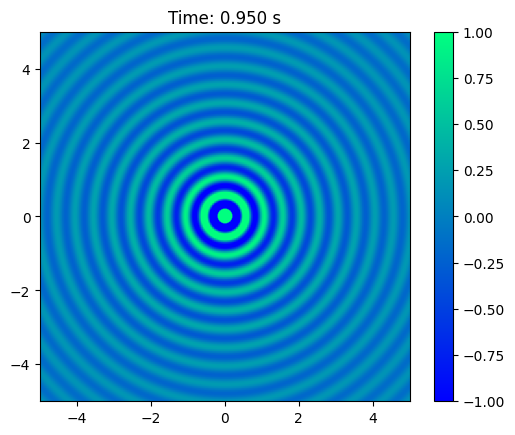

In [4]:

# Define constants
c = 1  # speed of wave in m/s
f = 2  # frequency in Hz
wavelength = c / f
k = 2 * np.pi / wavelength

# Define grid parameters
grid_size = 200  # number of points in the x and y directions
radius = 5  # radius of the simulation domain in meters
dx = 2 * radius / (grid_size - 1)  # spacing between grid points
x = np.linspace(-radius, radius, grid_size)
y = np.linspace(-radius, radius, grid_size)
X, Y = np.meshgrid(x, y)

# Define time parameters
duration = 1  # duration of the simulation in seconds
dt = 1 / (10 * f)  # time step size
num_frames = int(duration / dt)

# Define source parameters
source_pos = np.array([0, 0])  # position of the source in meters

# Initialize pressure and velocity fields
pressure = np.zeros((grid_size, grid_size))
velocity_x = np.zeros((grid_size, grid_size))
velocity_y = np.zeros((grid_size, grid_size))

# Create list to store frames for gif
frames = []

# Simulation loop
for i in range(num_frames):
    # Calculate distance from source to each grid point
    R = np.sqrt((X - source_pos[0])**2 + (Y - source_pos[1])**2)
    
    # Calculate pressure and velocity fields
    pressure = np.sin(k * R - 2 * np.pi * f * i * dt) / R
    velocity_x = -k * np.sin(k * R - 2 * np.pi * f * i * dt) * (X - source_pos[0]) / R
    velocity_y = -k * np.sin(k * R - 2 * np.pi * f * i * dt) * (Y - source_pos[1]) / R
    
    # Plot pressure field
    plt.clf()
    plt.imshow(pressure, cmap='winter', vmin=-1, vmax=1, extent=[-radius, radius, -radius, radius])
    plt.colorbar()
    plt.title('Time: {:.3f} s'.format(i * dt))
    
    # Add current frame to list of frames
    plt.gcf().canvas.draw()
    buf = plt.gcf().canvas.buffer_rgba()
    frames.append(np.array(buf))
    
# Save frames as gif
imageio.mimsave('spherical_wave.gif', frames, fps=20)



The code must now be modified to work in 3d. It does seem that a $\text{sinc}(r)$ function is suitable. Does bode well as Fourier transforms / analysis can be performed.

MovieWriter imagemagick unavailable; using Pillow instead.


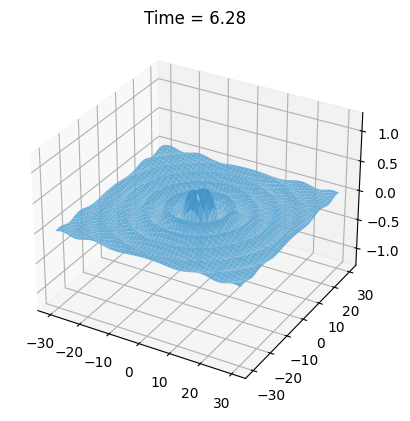

In [5]:
from matplotlib.animation import FuncAnimation

# Define function
def f(x, y, t):
    R = np.sqrt(x**2 + y**2)
    return np.sin(R - 2*np.pi*t) / R

# Set up grid and time parameters
x = np.linspace(-30, 30, 50)
y = np.linspace(-30, 30, 50)
X, Y = np.meshgrid(x, y)
T = np.linspace(0, 2*np.pi, 50)

# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize plot
surf = None
# Define update function for animation
def update(frame):
    global surf
    if surf:
        surf.remove()
    z = f(X, Y, T[frame])
    surf = ax.plot_surface(X, Y, z, cmap='Blues', vmin=-1,vmax=1)
    ax.set_zlim(-1.25, 1.25)
    ax.set_title('Time = {:.2f}'.format(T[frame]))
    return surf,
# Create animation
ani = FuncAnimation(fig, update, frames=len(T), blit=True)

# Save animation as GIF
ani.save('3d_sinc_animation.gif', writer='imagemagick', fps=20)


In terms of a general shape, this is perfect. Now the code must be modified to relate the angular frequency of the wave to the dispersion relation. 

The simplified dispersion relation is defined as $\omega^2 = (\frac{\gamma}{\rho})k^3$ where $\gamma$ is the surface tension and $\rho$ is the density.

More generally, the dispersion relation is defined as $\omega = k \sqrt{(\frac{g}{k}+ \frac{\gamma}{\rho}k)\tanh(kt)}$ where $g = 9.81$ $\text{ms}^{-2}$

$k$ is defined as $k = \frac{\pi h d_m}{m \lambda (h^2 +l^2)}$ where $h$ is the height of from the liquid to the central maximum, $l$ is the length from the liquid to the wall, $d$ is the spacing between maxima and $m$ is the order of diffraction. 

Note, $f(r,t) = \sin(kr - \omega t)$

In [33]:
#declaring constants
g = 9.81
density = 1000
surface_tension = 0.0728 #Surface tension of a liquid, must be given in N/m (divide by 1000 from mn/m)
order = 1 # Must be an integer
wavelength = 633 * 10**(-9) #Wavelength of red light
h = 0.13
l = 2.275
d = 0.0125 # All these measurements are in metres, modify these for each experiment.
k = (np.pi * h * d) / (order * wavelength * (h**2 + l**2))
ang_freq = np.sqrt((surface_tension/density)*k**3)
print(k)

1553.176932356551


MovieWriter imagemagick unavailable; using Pillow instead.


Frequency  = {:.2f} 83.12223633263162 Hz


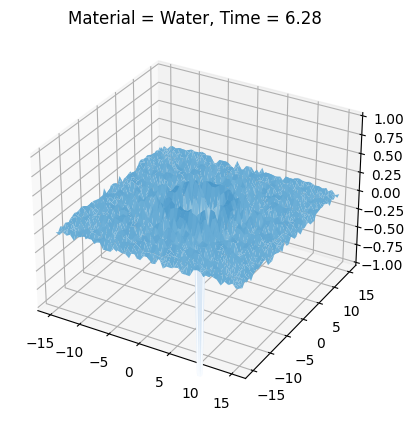

In [35]:

def f(x, y, t):
    R = np.sqrt(x**2 + y**2)
    return np.sin((k*R) - (ang_freq*t)) / R

# Set up grid and time parameters
x = np.linspace(-15, 15, 50) #Change these for changing the axis(s)
y = np.linspace(-15, 15, 50)
X, Y = np.meshgrid(x, y)
T = np.linspace(0, 2*np.pi, 50)

# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize plot
surf = None
# Define update function for animation
def update(frame):
    global surf
    if surf:
        surf.remove()
    z = f(X, Y, T[frame])
    surf = ax.plot_surface(X, Y, z, cmap='Blues', vmin=-1,vmax=1)
    ax.set_zlim(-1, 1)
    ax.set_title('Material = Water, Time = {:.2f}'.format(T[frame]))
    return surf,
# Create animation
ani = FuncAnimation(fig, update, frames=len(T), blit=True)

# Save animation as GIF
ani.save('capillary_wave.gif', writer='imagemagick', fps=20)
print("Frequency  = ", ang_freq/(2*np.pi), "Hz")


The simulation does break down at higher frequencies, however this is (sort of?) congruent with what we see experimentally, as we cannot distinguish between wavecrests at higher frequencies.